In [44]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [45]:
def f(x):
    return np.power(x[0]-4,2) + np.power(x[1]-4,2)

def h(x):
    return x[0] + x[1] - 5

In [46]:
def augmented_lagrange_method(f,h,x,k_max=100, d=1, y=2, e=1e-10):
    l = np.zeros_like(h(x))
    x_it = [x]
    for k in range(k_max):
        p = lambda x : f(x) + d/2 * h(x)**2 - l * h(x)

        xk = minimize(p, x).x
        x_it.append(xk)
        d *= y
        l -= d*h(xk)

        if np.linalg.norm(x-xk)<e:
            break
        x = xk

    return xk, x_it

In [47]:
x0, x_it = augmented_lagrange_method(f,h,[1.5,2])

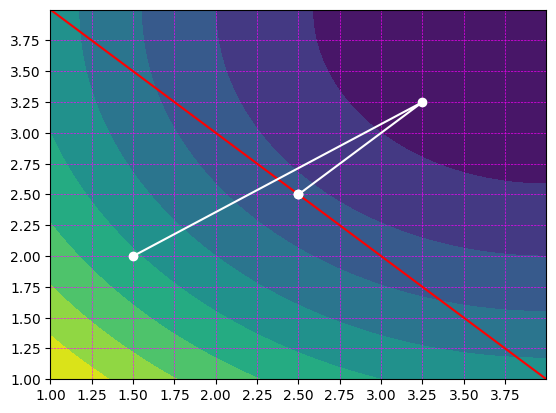

In [48]:
# Define range for input
r_min, r_max = 1, 4

xaxis = np.linspace(r_min, r_max, 200)
yaxis = np.linspace(r_min, r_max, 200)

x, y = np.meshgrid(xaxis, yaxis)

z = f([x,y])

x_it = np.array(x_it)

plt.contourf(x, y, z, levels=10, cmap='viridis')
plt.plot()

X = np.linspace(r_min, r_max, 200)
Y = 5 -X
plt.plot(X, Y, color="r")
plt.plot(x_it[:, 0], x_it[:, 1], 'o-', color='w')

plt.xlim(r_min, r_max)
plt.ylim(r_min, r_max)

plt.xticks(np.arange(min(xaxis), max(xaxis), 0.25))
plt.yticks(np.arange(min(yaxis), max(yaxis), 0.25))

plt.grid(True, linewidth=0.45, linestyle='--', color='magenta') 

plt.show()